# Cohort 38 AUCs analysis 

### Imports and environment setup

- Date of run: 2024-09-26
- Environment: python 3.12
- Packages required: pandas, numpy, sklearn, statsmodels, seaborn, matplotlib

In [1]:
# Include in the environment the code directory with the utils function
import sys
sys.path.append('../code/')

In [2]:
# Library imports
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Utils imports
import cohort_analysis_utils as utils
import ms_utils

In [3]:
# Remove warnings for readability
import warnings
warnings.filterwarnings('ignore')

# Remove cell printing limits
pd.set_option('display.max_rows', None)

# Data loading and preprosessing

For this analysis, we are going to work with the MS matrix ─located at ["data/ms/MS_verification_38.csv"](<../data/ms/MS_verification_38.csv>)─. For this dataset so far we have no metadata, just values for peptides and pathology condition for the 38 samples.

In [4]:
MS_38_PATH = "../data/ms/MS_verification_38.csv"

In [5]:
df_38 = pd.read_csv(MS_38_PATH, sep="\t", header=[0,1], index_col=0)

In [6]:
# Combine the names of headers at level 0 and 1 and make them the new headers
df_38.columns = ["_".join(filter(lambda x: x != '', col)).strip() for col in df_38.columns.values]


In [7]:
# Rename the column 0 to "Pathology" and make it categorical
df_38 = df_38.rename(columns={df_38.columns[0]: "Pathology"})
df_38 = utils.cols_as_category(df_38, {'Pathology':{'C2': 0, 'T1': 1}})

# Computing the models

In [8]:
# General parames
RESULTS_PATH = '../data/results/38'
BIOMARKERS_38 = df_38.columns[1:]
METHODS = ['direct']

In [9]:
models_38 = utils.compute_all_models_and_save(df=df_38, 
                                              biomarkers=BIOMARKERS_38, 
                                              target_col='Pathology', 
                                              methods=METHODS, 
                                              max_biomarker_count=1,
                                              folder_name=RESULTS_PATH,
                                              auc_threshold=0.0, 
                                              plot_rocs=True,
                                              compute_auc_ci=True)

In [10]:
# Load the results
df_38_results_direct_max_1 = pd.read_csv(f'{RESULTS_PATH}/direct/max_1.csv', sep=',', index_col=0, header=0)
df_38_results_direct_max_1.head(10)

,AUC,Sensitivity,Specificity,NPV,PPV,Best_Threshold
Biomarker_1,,,,,,
PERM_IANVFTNAFR,0.96667,0.95,0.88889,0.94118,0.90476,0.66667
PERM_VVLEGGIDPILR,0.95000,0.95,0.88889,0.94118,0.90476,0.64646
CADH1_VFYSITGQGADTPPVGVFIIER,0.94444,0.85,0.94444,0.85000,0.94444,0.66667
SPIT1_SFVYGGCLGNK,0.93333,0.95,0.94444,0.94444,0.95000,0.67677
CADH1_NLVQIK,0.92500,0.85,0.94444,0.85000,0.94444,0.66667
SPIT1_WYYDPTEQICK,0.92500,0.90,0.94444,0.89474,0.94737,0.67677
ENOA_YISPDQLADLYK,0.91944,0.75,0.94444,0.77273,0.93750,0.66667
KPYM_NTGIICTIGPASR,0.91389,0.75,0.94444,0.77273,0.93750,0.67677
CASP3_SGTDVDAANLR,0.91389,0.85,0.88889,0.84211,0.89474,0.60606


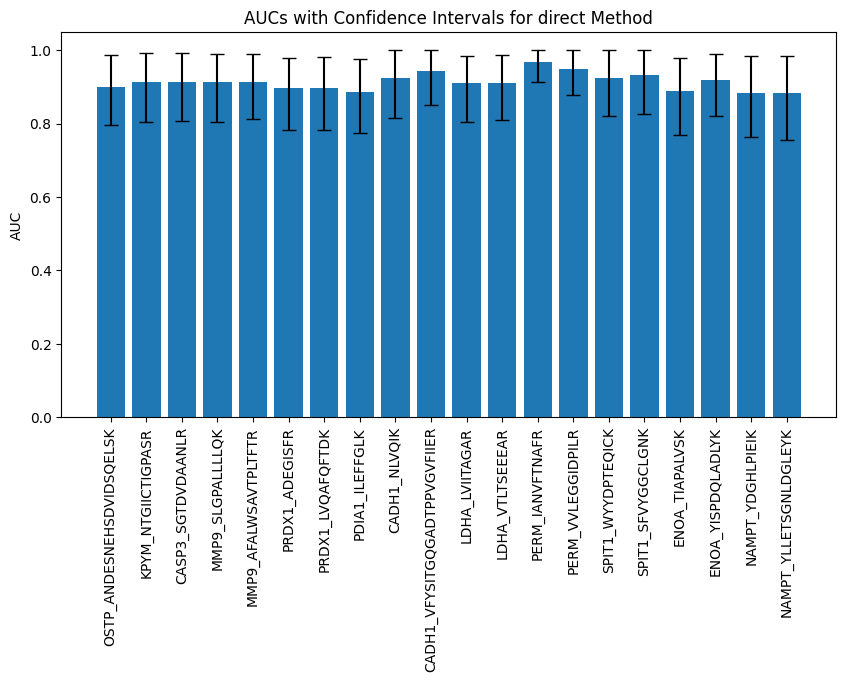

In [11]:
BIOMARKERS_38_cis = df_38_results_direct_max_1.head(20).index
utils.plot_aucs_with_confidence_intervals(models_38, 'direct', BIOMARKERS_38_cis)

In [30]:
BIOMARKERS_38_cis = df_38_results_direct_max_1.head(30).index
BIOMARKERS_high = []
for bmk in BIOMARKERS_38_cis:
    prot = bmk.split('_')[0]
    pep = bmk.split('_')[1]
    if prot not in  [p.split("_")[0] for p in BIOMARKERS_high]:
        BIOMARKERS_high.append(bmk)

In [26]:
_ = utils.compute_all_models_and_save(df=df_38, 
                                        biomarkers=BIOMARKERS_high, 
                                        target_col='Pathology', 
                                        methods=METHODS, 
                                        max_biomarker_count=3,
                                        folder_name=RESULTS_PATH,
                                        auc_threshold=0.0, 
                                        plot_rocs=True)

In [29]:
df_38_results_direct_max_3 = pd.read_csv(f'{RESULTS_PATH}/direct/max_3.csv', sep=',', index_col=0, header=0)
df_38_results_direct_max_3.head(10)

,Biomarker_2,Biomarker_3,AUC,Sensitivity,Specificity,NPV,PPV,Best_Threshold
Biomarker_1,,,,,,,,
PERM_IANVFTNAFR,CASP3_SGTDVDAANLR,OSTP_ANDESNEHSDVIDSQELSK,0.98333,1.00,0.94444,1.00000,0.95238,0.67677
PERM_IANVFTNAFR,ANXA2_GVDEVTIVNILTNR,TPIS_SNVSDAVAQSTR,0.98333,1.00,0.94444,1.00000,0.95238,0.30303
PERM_IANVFTNAFR,OSTP_ANDESNEHSDVIDSQELSK,NaN,0.98056,0.95,0.94444,0.94444,0.95000,0.69697
PERM_IANVFTNAFR,LDHA_LVIITAGAR,TPIS_SNVSDAVAQSTR,0.97778,1.00,0.88889,1.00000,0.90909,0.26263
LDHA_LVIITAGAR,OSTP_ANDESNEHSDVIDSQELSK,NAMPT_YDGHLPIEIK,0.97778,0.95,0.94444,0.94444,0.95000,0.67677
PERM_IANVFTNAFR,MMP9_SLGPALLLLQK,OSTP_ANDESNEHSDVIDSQELSK,0.97500,0.90,0.94444,0.89474,0.94737,0.66667
PERM_IANVFTNAFR,OSTP_ANDESNEHSDVIDSQELSK,CTNB1_LLNDEDQVVVNK,0.97500,0.95,0.94444,0.94444,0.95000,0.69697
PERM_IANVFTNAFR,CADH1_VFYSITGQGADTPPVGVFIIER,TPIS_SNVSDAVAQSTR,0.97222,0.95,0.94444,0.94444,0.95000,0.49495
PERM_IANVFTNAFR,ENOA_YISPDQLADLYK,LDHA_LVIITAGAR,0.96944,1.00,0.88889,1.00000,0.90909,0.29293
